In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./../data/train.csv')
test = pd.read_csv('./../data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# que columnas tienen los datos?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# qué tamaño tienen los datos?
train.shape

(891, 12)

In [6]:
# hay valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
# como se distribuyen las variables numéricas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# como se comportan las variables categóricas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train.groupby(['Survived']).count()['PassengerId']


Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [10]:
# target vs sex
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


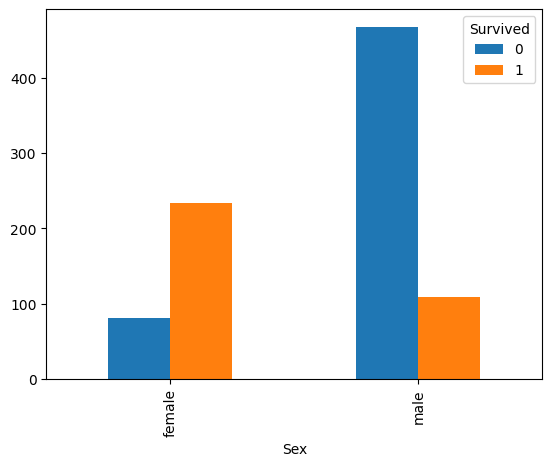

In [11]:
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


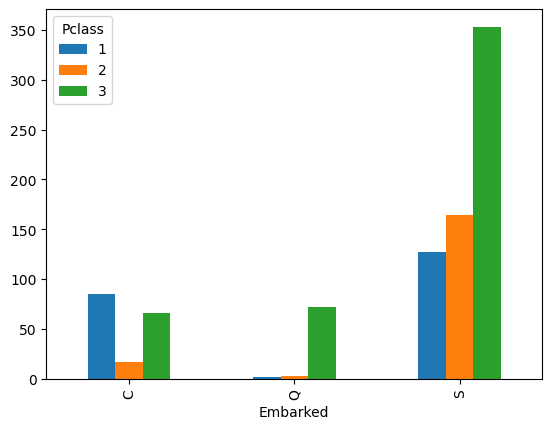

In [12]:
# embarked vs pclass
print(train.groupby(['Pclass', 'Embarked'])
        .count()['PassengerId']
        .unstack(level=0)
        .plot.bar())

In [43]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'Embarked']].head(3)

,Survived,Sex,Age,Pclass,Embarked
0,0,0,22.0,3,S
1,1,1,38.0,1,C
2,1,1,26.0,3,S


In [44]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 27.9+ KB


In [16]:
# mirar como se distribuyen los nulos en edad
(train[train['Age'].isna()]
      .groupby(['Sex', 'Pclass'])
      .count()['PassengerId']
      .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [48]:
(train[train['Age'].isna()]
      .groupby(['Sex', 'Pclass'])
      .count()['PassengerId']
      .unstack(level=0))

Sex
Pclass


In [46]:
# calcular mediana de Age para imputar
train['Age'].median()

28.0

In [47]:
train['Age'] = train['Age'].fillna(28.0)
train['Embarked'] = train['Embarked'].fillna('S')
train[['Survived', 'Sex', 'Age', 'Pclass', 'Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 27.9+ KB


In [20]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [21]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [22]:
# crear nueva variable tipo flag "solo"
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


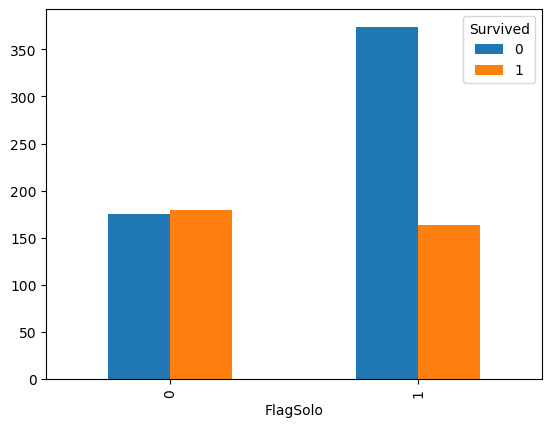

In [49]:
grouped_flag = train.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [ ]:
train['Flagcab'] = np.where(
    (train['Embarked'] == "S"), 1, 0)

In [53]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo','Flagcab']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo,Flagcab
0,0,0,22.0,3,0,1
1,1,1,38.0,1,0,0
2,1,1,26.0,3,1,1


In [54]:
# variable dependiente
Y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo','Flagcab']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 5)


In [55]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [56]:
# entrenando modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [58]:
# ahora hay que preparar el test set para evaluación
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name  Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    0  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    0  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  FlagSolo  
0      0  330911  7.8292   NaN        Q         1  
1      0  363272  7.0000   NaN        S         0  
2      0  240276  9.6875   NaN        Q         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int6

In [60]:
# preprocesando test set

# hacer map a Sex
#test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)
# Crear FlagCabina
test['Flagcab'] = np.where(
    (test['Embarked'] == "S"), 1, 0)

In [62]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int32  
 12  Flagcab      418 non-null    int32  
dtypes: float64(2), int32(3), int64(4), object(4)
memory usage: 31.1+ KB
None


,Sex,Age,Pclass,FlagSolo,Flagcab
0,0,34.5,3,1,0
1,1,47.0,3,0,1
2,0,62.0,2,1,0


In [63]:
# crear test set 
X_test = test[features]

print(X_test.shape)

(418, 5)


In [64]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


In [65]:
# prediciendo sobre el test set
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1]
[0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0]


In [66]:
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test.PassengerId, 
                         'Survived': y_pred})
  output.to_csv(name, index=False)

In [67]:
download_output(Y_pred_log, 'veracarlosjr_pred_log.csv')
download_output(Y_pred_tree, 'veracarlosjr_pred_tree.csv')